<a href="https://colab.research.google.com/github/AntonGitOrlov/Data_Science/blob/main/%22%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Python_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D1%81_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22_%D0%9E%D1%80%D0%BB%D0%BE%D0%B2%D0%90%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель блокнота

Закрепление навыков
* обработки табличных данных в библиотеке Pandas
* визуализации данных в библиотеке Seaborn
* создание объектов pipeline для предварительной обработки данных в библиотеке scikit-learn

# Задача

**Предсказание успеваемости студентов**
Вам предстоит попробовать себя в оценке данных успеваемости студентов при взаимодействии в электронной среде. Кто сколько баллов наберет в итоге.

**Acknowledgements**
Авторы набора данных: Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).

# Скачиваем Данные

In [1]:
#↓ "скачай" + ссылка на скачивание
!wget https://github.com/dayekb/mpti_ml/raw/main/competition/data.zip

--2024-11-30 09:35:49--  https://github.com/dayekb/mpti_ml/raw/main/competition/data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/data.zip [following]
--2024-11-30 09:35:50--  https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47117149 (45M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  44.93M   120MB/s    in 0.4s    

2024-11-30 09:35:51 (120 MB/s) - ‘data.zip’ saved [47117149/47117149]



Распаковываем архив "на месте"

In [2]:
#↓ "распакуй" + имя архива
!unzip data.zip

Archive:  data.zip
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 
  inflating: studentAssessment.csv   


# Загружаем данные в Pandas

Обновим `scikit-learn` чтобы воспользоваться некими новинками.

Например `TargetEncoder`

In [3]:
!pip install -U scikit-learn

In [4]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

In [5]:
plt.style.use('bmh') # выбираем стиль для отрисовки

In [6]:
# загружаем данные
ass = pd.read_csv('/content/assessments.csv')
courses = pd.read_csv('/content/courses.csv')
results = pd.read_csv('/content/studentAssessment.csv')
info = pd.read_csv('/content/studentInfo.csv')
reg = pd.read_csv('/content/studentRegistration.csv')
vle = pd.read_csv('/content/studentVle.csv')
materials = pd.read_csv('/content/vle.csv')

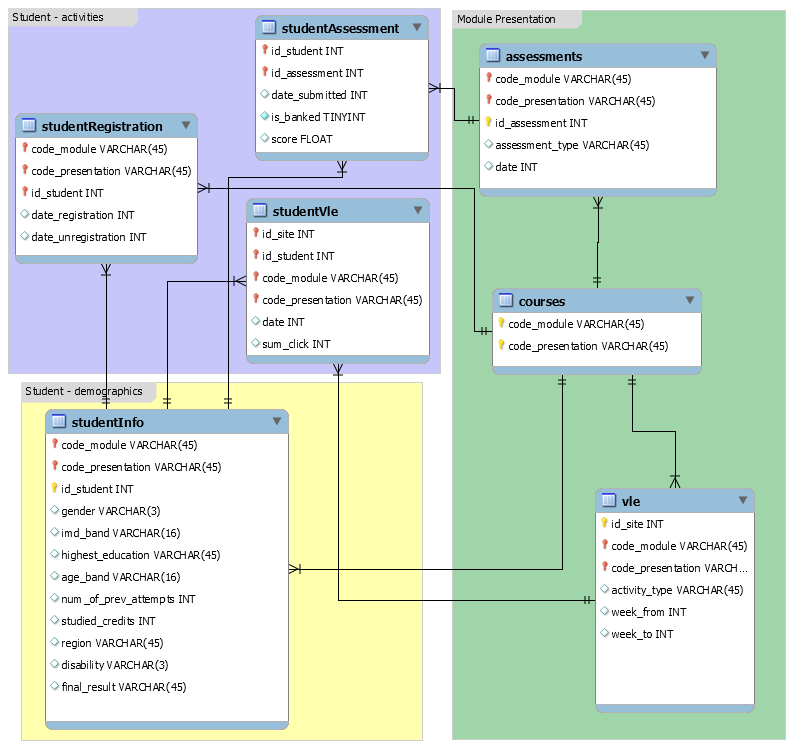

## Assessments info (информация об оценках)

1. **code_module** – идентификационный код модуля, которому принадлежит оценка.
2. **code_presentation** - идентификационный код презентации, к которой относится оценка.
3. **id_assessment** – идентификационный номер оценки.
4. **assessment_type** – вид оценки. Существует три типа оценок: оцениваемая репетитором (TMA), компьютерная оцениваемая оценка (CMA) и итоговый экзамен (Exam).
5. **date** – информация об окончательной дате сдачи оценки, рассчитанная как количество дней с момента начала модуля-презентации. Дата начала презентации имеет номер 0 (ноль).
6. **weight** - вес оценки в %. Обычно Экзамены обрабатываются отдельно и имеют вес 100%; сумма всех остальных оценок равна 100%.

In [7]:
ass.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [8]:
ass['id_assessment'] = ass['id_assessment'].astype(object)

In [9]:
ass # Метод .head() - первые 5 строк

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


## Assessments results (результаты оценки)



1. **id_assessment** – идентификационный номер оценки.
2. **id_student** –уникальный идентификационный номер студента.
3. **date_submitted** – дата представления студентом, измеряемая как количество дней с начала презентации модуля.
4. **is_banked** – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.

In [10]:
results.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id_assessment   173912 non-null  int64
 1   id_student      173912 non-null  int64
 2   date_submitted  173912 non-null  int64
 3   is_banked       173912 non-null  int64
dtypes: int64(4)
memory usage: 5.3 MB


In [11]:
results['id_assessment'] = results['id_assessment'].astype(object)
results['id_student'] = results['id_student'].astype(object)

In [12]:
results  # Метод .head() - первые 5 строк

,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0
...,...,...,...,...
173907,37443,527538,227,0
173908,37443,534672,229,0
173909,37443,546286,215,0
173910,37443,546724,230,0


## Courses info (информация о курсах)

1. **code_module** – кодовое имя модуля, которое служит идентификатором.
2. **code_presentation** – кодовое название презентации. Он состоит из года и «B» для презентации, начинающейся в феврале, и «J» для презентации, начинающейся в октябре.
3. **module_presentation_length** - длина модуля-презентации в днях.

In [13]:
courses.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [14]:
courses # Метод .head() - первые 5 строк

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


## Student registration (регистрация студентов)

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **date_registration** – дата регистрации студента на презентацию модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентацию модуля за 30 дней до ее начала).

In [15]:
reg.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [16]:
reg['id_student'] = reg['id_student'].astype(object)

In [17]:
reg # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0
...,...,...,...,...
32588,GGG,2014J,2640965,-4.0
32589,GGG,2014J,2645731,-23.0
32590,GGG,2014J,2648187,-129.0
32591,GGG,2014J,2679821,-49.0


## VLE resources

1. **id_site** - идентификационный номер материала.
2. **code_module** – идентификационный код модуля.
3. **code_presentation** - идентификационный код презентации.
4. **activity_type** – роль, связанная с материалом модуля.
5. **week_from** – неделя, с которой планируется использовать материал.
6. **week_to** – неделя, до которой планируется использовать материал.

In [18]:
materials.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [19]:
materials['activity_type'].value_counts()

,count
activity_type,
resource,2660
subpage,1055
oucontent,996
url,886
forumng,194
quiz,127
page,102
oucollaborate,82
questionnaire,61


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [20]:
materials['id_site'] = materials['id_site'].astype(object)

In [21]:
materials.head() # Метод .head() - первые 5 строк

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


## VLE Interactions

1. **code_module** – идентификационный код модуля.
2. **code_presentation** - идентификационный код презентации.
3. **id_student** – уникальный идентификационный номер студента.
4. **id_site** - идентификационный номер материала VLE.
5. **date** – дата взаимодействия студента с материалом измеряется как количество дней с начала модуля-презентации.
6. **sum_click** – сколько раз учащийся взаимодействовал с материалом в этот день.

In [22]:
vle.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [23]:
vle['id_student'] = vle['id_student'].astype(object)
vle['id_site'] = vle['id_site'].astype(object)

In [24]:
vle.head() # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


# Задание 1

Воспользоваться [агрегацией](https://colab.research.google.com/drive/1-EccWJJj_3GvhVrv2kEauYSFG40dbwuW#scrollTo=zQMW53tgMkO4) и сгенерировать признаки для триплетов (`code_module` , `code_presentation` , `id_student`)

Базовая идея (на зачет в промежуточной аттестации) - взять простую сумму колонки `sum_click`


Продвинутая (на развитие) - учитывать не только суммарное значение в этой колонке. Так же использовать `date` (например как рано начал работать над заданием) и `id_site` (сколько разных материалов студент изучил) для признаков

Продвинутая* (для самых не ленивых) - объединить таблицы `materials` и `vle` для более детального анализа и генерирования признаков

In [25]:
# Место для вашего кода
# 1

# vle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum()

In [26]:
# 2

# group_result = vle.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': 'sum',
#                                                                                    'date': 'min',
#                                                                                    'id_site': 'count'
#                                                                                    })
# group_result

In [27]:
# 3

merge_vle_materials = pd.merge(vle, materials, on=['code_module', 'code_presentation', 'id_site'], how='inner')

group_result = merge_vle_materials.groupby(['code_module', 'code_presentation', 'id_student']).agg({'sum_click': 'sum', # кол-во взаимодейтсвий с материалом суммарно
                                                                                   'date': 'min', # насколько рано начал
                                                                                   'id_site': 'count', # кол-во используемых материалов
                                                                                   'activity_type': 'nunique' # кол-во уникальных видов ресурсов
                                                                                   })
group_result


sum_click  date  id_site  \
code_module code_presentation id_student                             
AAA         2013J             11391             934    -5      196   
                              28400            1435   -10      430   
                              30268             281   -10       76   
                              31604            2158   -10      663   
                              32885            1034   -10      352   
...                                             ...   ...      ...   
GGG         2014J             2640965            41    -4       19   
                              2645731           893    19      237   
                              2648187           312   -10      108   
                              2679821           275   -14       61   
                              2684003           616   -15      181   

                                          activity_type  
code_module code_presentation id_student                 
AAA         2013J             11391                   6  
                              28400                   7  
                              30268                   6  
                              31604                   8  
                              32885                   7  
...                                                 ...  
GGG         2014J             2640965                 4  
                              2645731                 7  
                              2648187                 6  
                              2679821                 6  
                              2684003                 6  

[29228 rows x 4 columns]

In [28]:
group_result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29228 entries, ('AAA', '2013J', 11391) to ('GGG', '2014J', 2684003)
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sum_click      29228 non-null  int64
 1   date           29228 non-null  int64
 2   id_site        29228 non-null  int64
 3   activity_type  29228 non-null  int64
dtypes: int64(4)
memory usage: 1.2+ MB


## Student information

1. **code_module** – идентификационный код модуля, на котором зарегистрирован студент.
2. **code_presentation** - идентификационный код презентации, во время которой студент регистрируется на модуле.
3. **id_student** – уникальный идентификационный номер студента.
4. **gender** – пол ученика.
5. **region** – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
6. **highest_education** – самый высокий уровень образования студента при поступлении на модульную презентацию.
7. **imd_band** – задает диапазон [Index of Multiple Depravation](https://en.wikipedia.org/wiki/Multiple_deprivation_index#:~:text=Indices%20of%20multiple%20deprivation%20(IMD,a%20single%20score%20of%20deprivation.) места, где студент проживал во время модуля-презентации. (насколько бедный район, короче)
8. **age_band** – диапазон студенческого возраста.
9. **num_of_prev_attempts** – количество раз, когда учащийся пытался пройти этот модуль.
10. **studied_credits** – общее количество кредитов по модулям, которые студент изучает в настоящее время.
11. **disability** – указывает, признан ли студент инвалидом.

In [29]:
info.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


Чтобы потом не путаться спрячем id-шники в тип данных "объект"

In [30]:
info['id_student'] = info['id_student'].astype(object)

In [31]:
info  # Метод .head() - первые 5 строк

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N
...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N


# Как можно объединять данные

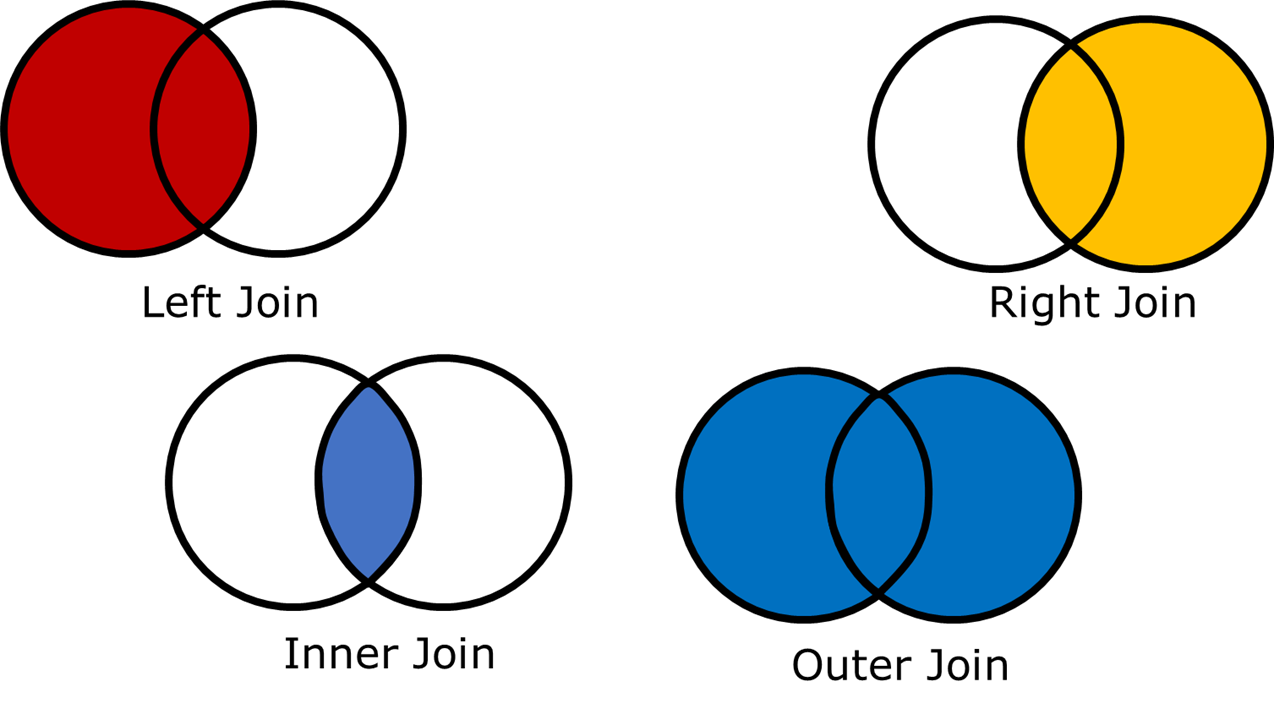

Если мы просто смотрим что можно объединить (в плане признаков), то наверное лучше воспользоваться Inner Join (т.е. только то что есть в обоих фреймах)


### Регистрация + Информация о курсах

In [32]:
#                                     ↓ по каким колонкам буддем объединять     ↓ как
regCourses = pd.merge(reg, courses, on=['code_module', 'code_presentation'], how='inner')

regCourses

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,269
32589,GGG,2014J,2645731,-23.0,269
32590,GGG,2014J,2648187,-129.0,269
32591,GGG,2014J,2679821,-49.0,269


### Регистрация + Информация о курсах + Инфа о студентах

In [33]:
#                                                   ↓ по каким колонкам буддем объединять              ↓ как
regCoursesInfo = pd.merge(regCourses, info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfo

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N
32589,GGG,2014J,2645731,-23.0,269,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N
32590,GGG,2014J,2648187,-129.0,269,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y
32591,GGG,2014J,2679821,-49.0,269,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N


# Задание 2


Воспользоваться [объединением](https://colab.research.google.com/drive/1-EccWJJj_3GvhVrv2kEauYSFG40dbwuW#scrollTo=zCjDnrlvBigL) и добавить в таблицу сгенерированные вам признаки

Продвинутый уровень - воспользоваться другими таблицами тоже

In [34]:
# Место для вашего кода
# была ошибка: убрал размерность ['nunique'] при аггрегации из group_result
regCoursesInfoGroup = pd.merge(regCoursesInfo, group_result, on=['code_module', 'code_presentation', 'id_student'], how='inner')

regCoursesInfoGroup

,code_module,code_presentation,id_student,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type
0,AAA,2013J,11391,-159.0,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934,-5,196,6
1,AAA,2013J,28400,-53.0,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435,-10,430,7
2,AAA,2013J,30268,-92.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281,-10,76,6
3,AAA,2013J,31604,-52.0,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158,-10,663,8
4,AAA,2013J,32885,-176.0,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034,-10,352,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,GGG,2014J,2640965,-4.0,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,41,-4,19,4
29224,GGG,2014J,2645731,-23.0,269,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,893,19,237,7
29225,GGG,2014J,2648187,-129.0,269,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,312,-10,108,6
29226,GGG,2014J,2679821,-49.0,269,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,275,-14,61,6


In [35]:
regCoursesInfoGroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29228 entries, 0 to 29227
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 29228 non-null  object 
 1   code_presentation           29228 non-null  object 
 2   id_student                  29228 non-null  object 
 3   date_registration           29221 non-null  float64
 4   module_presentation_length  29228 non-null  int64  
 5   gender                      29228 non-null  object 
 6   region                      29228 non-null  object 
 7   highest_education           29228 non-null  object 
 8   imd_band                    28174 non-null  object 
 9   age_band                    29228 non-null  object 
 10  num_of_prev_attempts        29228 non-null  int64  
 11  studied_credits             29228 non-null  int64  
 12  disability                  29228 non-null  object 
 13  sum_click                   292

# Выделение тренировочной выборки

Список студентов, соответсвующих модулей и презентаций (разные студенты могут сдавать разные модули)

In [36]:
Train_Who = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Train_Who.csv')
Train_Who

,id,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J
2,2,1674799,CCC,2014J
3,3,195246,FFF,2014J
4,4,582080,FFF,2013J
...,...,...,...,...
26069,26069,588477,AAA,2014J
26070,26070,653826,BBB,2014J
26071,26071,126411,BBB,2013B
26072,26072,547448,DDD,2013J


In [37]:
Train_Who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 26074 non-null  int64 
 1   id_student         26074 non-null  int64 
 2   code_module        26074 non-null  object
 3   code_presentation  26074 non-null  object
dtypes: int64(2), object(2)
memory usage: 814.9+ KB


А вот тут Left Join по всему содержимому `Train_Who`

Потому что мы не хотим ничего упустить оттуда

При выполнении задания не забудьте поменять `regCoursesInfo` на название таблицы в которое вы добавили признаки в задании 2

In [38]:
#                                               ↓ по каким колонкам буддем объединять               ↓ как
Train = pd.merge(Train_Who, regCoursesInfoGroup, on=['id_student', 'code_module', 'code_presentation'], how='left')
# Прячем "наш" id в index фрейма
Train.index = Train.id
# удаляем как столбец, ибо зачем
Train.drop(columns = ['id'], inplace = True)
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type
id,,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,1694.0,-16.0,595.0,9.0
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,692.0,-18.0,327.0,9.0
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,1963.0,-18.0,641.0,9.0
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,2138.0,-18.0,719.0,12.0
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,188.0,-18.0,82.0,8.0


In [39]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23360 non-null  float64
 4   module_presentation_length  23364 non-null  float64
 5   gender                      23364 non-null  object 
 6   region                      23364 non-null  object 
 7   highest_education           23364 non-null  object 
 8   imd_band                    22521 non-null  object 
 9   age_band                    23364 non-null  object 
 10  num_of_prev_attempts        23364 non-null  float64
 11  studied_credits             23364 non-null  float64
 12  disability                  23364 non-null  object 
 13  sum_click                   23364 no

# Целевая переменная

Для регрессии - это взешенная оценка отдельного **студента** за конкретную **презентацию** по конкретному **модулю**


In [40]:
Target = pd.read_csv('https://raw.githubusercontent.com/dayekb/mpti_ml/main/competition/Train_Target_reg.csv', index_col = 'id')

In [41]:
Target

,weighted_score
id,
0,64.9125
1,14.8625
2,61.4300
3,39.5000
4,9.2500
...,...
26069,75.0000
26070,0.0000
26071,1.0000


Положим целевую переменную в нашу общую таблицу

In [42]:
Train['weighted_score'] = Target

In [43]:
Train.head()

,id_student,code_module,code_presentation,date_registration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,date,id_site,activity_type,weighted_score
id,,,,,,,,,,,,,,,,,,
0,464685,DDD,2014B,-36.0,241.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,1.0,70.0,N,1694.0,-16.0,595.0,9.0,64.9125
1,606593,DDD,2013J,-32.0,261.0,M,Scotland,A Level or Equivalent,20-30%,0-35,0.0,120.0,N,692.0,-18.0,327.0,9.0,14.8625
2,1674799,CCC,2014J,-21.0,269.0,M,South Region,HE Qualification,70-80%,55<=,0.0,60.0,N,1963.0,-18.0,641.0,9.0,61.4300
3,195246,FFF,2014J,-124.0,269.0,M,West Midlands Region,Lower Than A Level,10-20,0-35,0.0,60.0,N,2138.0,-18.0,719.0,12.0,39.5000
4,582080,FFF,2013J,-114.0,268.0,M,South East Region,Lower Than A Level,10-20,35-55,0.0,60.0,N,188.0,-18.0,82.0,8.0,9.2500


In [44]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  26074 non-null  object 
 1   code_module                 26074 non-null  object 
 2   code_presentation           26074 non-null  object 
 3   date_registration           23360 non-null  float64
 4   module_presentation_length  23364 non-null  float64
 5   gender                      23364 non-null  object 
 6   region                      23364 non-null  object 
 7   highest_education           23364 non-null  object 
 8   imd_band                    22521 non-null  object 
 9   age_band                    23364 non-null  object 
 10  num_of_prev_attempts        23364 non-null  float64
 11  studied_credits             23364 non-null  float64
 12  disability                  23364 non-null  object 
 13  sum_click                   23364 no

# Исследовательский анализ данных

пригодилось то, что мы все id-шники закинули в тип данных `object`

теперь можем "автоматически" выполнять предварительную обработку по колонкам

In [45]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in Train.columns: # смотрим на все колонки в DataFrame
    if (Train[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['id_student', 'code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability'] 
 Число столблцов =  9
Числовые данные:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'sum_click', 'date', 'id_site', 'activity_type', 'weighted_score'] 
 Число столблцов =  9


# Задание 3

Выполните предварительный анализ [числовых](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=1TSzJ0S-vrTZ) и [категориальных](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=wQ_UIlY63u4d) признаков

1. Для числовых признаков отметьте признаки с наибольшим разбросом, а также признаки с не нормальным распределением.

2. Для категориальных признаков оцените встречаемость отдельных категорий. Предположите, понадобится ли работа с редкими категориями

### 3.1

In [46]:
Train[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date_registration           23360 non-null  float64
 1   module_presentation_length  23364 non-null  float64
 2   num_of_prev_attempts        23364 non-null  float64
 3   studied_credits             23364 non-null  float64
 4   sum_click                   23364 non-null  float64
 5   date                        23364 non-null  float64
 6   id_site                     23364 non-null  float64
 7   activity_type               23364 non-null  float64
 8   weighted_score              26074 non-null  float64
dtypes: float64(9)
memory usage: 2.0 MB


In [47]:
# Место для вашего кода
Train[num_columns].describe()

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,sum_click,date,id_site,activity_type,weighted_score
count,23360.000000,23364.000000,23364.000000,23364.000000,23364.00000,23364.000000,23364.000000,23364.000000,26074.000000
mean,-66.764512,256.137562,0.157636,77.945129,1350.11552,-8.207370,363.440079,8.214518,41.483596
std,47.677152,13.119396,0.473156,39.391992,1721.20149,13.039649,376.491566,2.584636,33.958099
min,-312.000000,234.000000,0.000000,30.000000,1.00000,-25.000000,1.000000,1.000000,0.000000
25%,-96.000000,241.000000,0.000000,60.000000,258.75000,-17.000000,93.000000,7.000000,2.600000
50%,-53.000000,262.000000,0.000000,60.000000,738.00000,-10.000000,241.000000,8.000000,46.987500
75%,-29.000000,268.000000,0.000000,90.000000,1770.00000,-4.000000,509.000000,10.000000,73.333333
max,124.000000,269.000000,6.000000,540.000000,24139.00000,238.000000,2953.000000,15.000000,100.000000


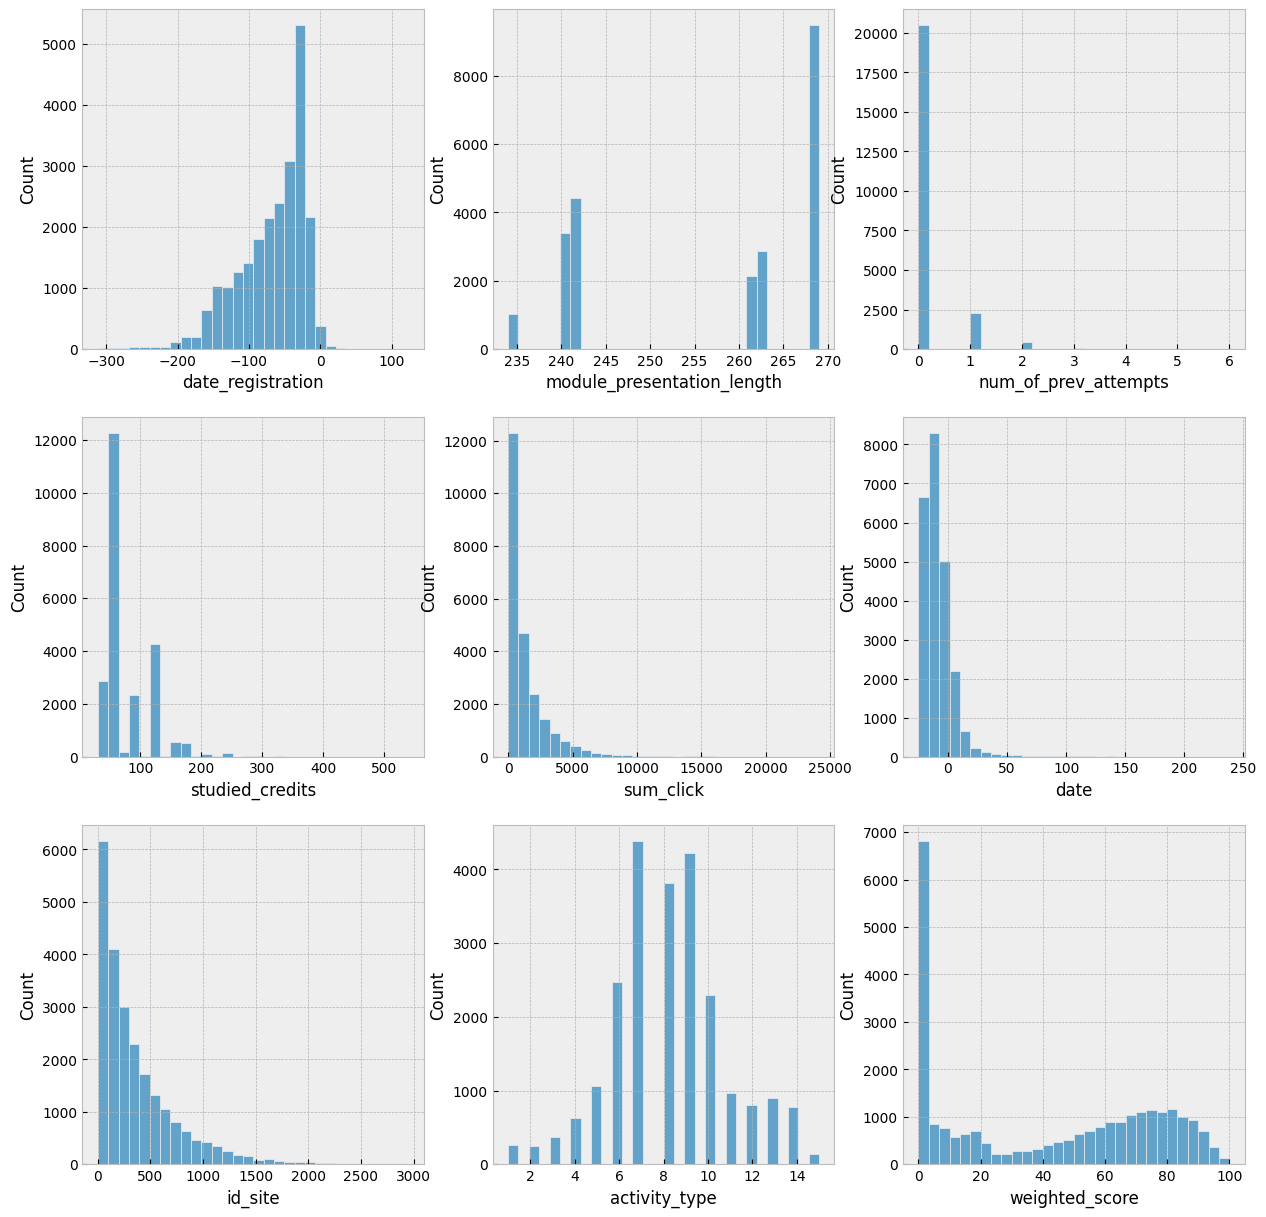

In [48]:
width = 3
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15,15)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовки
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=Train, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 30);  # на сколько ячеек разбиваем

**Вывод:**
 - признаки с наибольшим разбросом: **sum_click** и **id_site**
 - признаки с нормальным распределением: **activity_type**

### 3.2

In [49]:
Train[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26074 entries, 0 to 26073
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_student         26074 non-null  object
 1   code_module        26074 non-null  object
 2   code_presentation  26074 non-null  object
 3   gender             23364 non-null  object
 4   region             23364 non-null  object
 5   highest_education  23364 non-null  object
 6   imd_band           22521 non-null  object
 7   age_band           23364 non-null  object
 8   disability         23364 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [50]:
Train[cat_columns].describe()

,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability
count,26074,26074,26074,23364,23364,23364,22521,23364,23364
unique,23579,7,4,2,13,5,10,3,2
top,399863,BBB,2014J,M,Scotland,A Level or Equivalent,30-40%,0-35,N
freq,4,6327,9042,13010,2509,10123,2567,16338,21117


In [51]:
Train[cat_columns].nunique()

,0
id_student,23579
code_module,7
code_presentation,4
gender,2
region,13
highest_education,5
imd_band,10
age_band,3
disability,2


In [52]:
Train['id_student'].value_counts() # некоторые студенты учили одновременно на двух и более курсах...

,count
id_student,
399863,4
572154,4
616407,4
548926,4
2046628,4
...,...
559261,1
498835,1
496224,1


In [53]:
Train['code_module'].value_counts()

,count
code_module,
BBB,6327
FFF,6210
DDD,5018
CCC,3547
EEE,2347
GGG,2027
AAA,598


In [54]:
Train['code_presentation'].value_counts()

,count
code_presentation,
2014J,9042
2013J,7074
2014B,6226
2013B,3732


In [55]:
Train['gender'].value_counts()

,count
gender,
M,13010
F,10354


In [56]:
Train['region'].value_counts()

,count
region,
Scotland,2509
East Anglian Region,2394
London Region,2276
South Region,2245
North Western Region,2034
West Midlands Region,1766
South West Region,1724
East Midlands Region,1688
Wales,1569


In [57]:
Train['highest_education'].value_counts()

,count
highest_education,
A Level or Equivalent,10123
Lower Than A Level,9259
HE Qualification,3499
No Formal quals,242
Post Graduate Qualification,241


In [58]:
Train['imd_band'].value_counts()

,count
imd_band,
30-40%,2567
20-30%,2559
10-20,2443
40-50%,2327
50-60%,2260
0-10%,2254
60-70%,2135
70-80%,2092
80-90%,2002


In [59]:
Train['age_band'].value_counts()

,count
age_band,
0-35,16338
35-55,6867
55<=,159


In [60]:
Train['disability'].value_counts()

,count
disability,
N,21117
Y,2247


**Вывод:**
Можно исключить старшую возрастную группу (55+ лет), менее 0,5%

# Задание 4

Предварительно оцените "полезность" признаков для предсказания целевой переменной

1. Для числовых признаков оцените [корреляцию числовых признаков](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=QWcv1qUsUVyz) с целевой переменной

2. Для категориальных признаков [воспользуйте группировкой](https://colab.research.google.com/drive/1DKF7VZfDMSQH06YAqGmQqypMboejVkgS#scrollTo=v65j22F292KS) для оценки связи с целевой переменной

### 4.1

In [61]:
# Место для вашего кода
Train[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                                    vmin = -1, # указываем нижний диапазон
                                                    vmax=1) # указываем верхний  диапазон

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,sum_click,date,id_site,activity_type,weighted_score
date_registration,1.000000,-0.041839,-0.017882,-0.060719,-0.039117,0.137548,-0.056986,-0.029867,0.013045
module_presentation_length,-0.041839,1.000000,-0.063917,-0.024526,0.051056,-0.035565,0.029337,0.032279,0.054481
num_of_prev_attempts,-0.017882,-0.063917,1.000000,0.178706,-0.071203,0.063185,-0.077961,-0.055617,-0.111979
studied_credits,-0.060719,-0.024526,0.178706,1.000000,-0.013173,-0.087399,-0.012043,0.055892,-0.137414
sum_click,-0.039117,0.051056,-0.071203,-0.013173,1.000000,-0.247478,0.932852,0.642846,0.516986
date,0.137548,-0.035565,0.063185,-0.087399,-0.247478,1.000000,-0.303479,-0.331765,-0.116338
id_site,-0.056986,0.029337,-0.077961,-0.012043,0.932852,-0.303479,1.000000,0.676271,0.588288
activity_type,-0.029867,0.032279,-0.055617,0.055892,0.642846,-0.331765,0.676271,1.000000,0.492261
weighted_score,0.013045,0.054481,-0.111979,-0.137414,0.516986,-0.116338,0.588288,0.492261,1.000000


**Вывод:**
значительная корреляция с целевой признаков у: **sum_click**, **id_site** и **activity_type**

### 4.2

In [62]:
# Категориальные данные:	  ['id_student', 'code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']

In [103]:
Train.groupby(['code_module']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                    median       mean
code_module                          
AAA               66.35000  56.403010
BBB               48.95000  40.322135
CCC                8.28500  30.024080
DDD               27.16875  35.469465
EEE               68.44000  52.954239
FFF               50.50000  45.166989
GGG               62.00000  51.082552

In [102]:
Train.groupby(['code_presentation']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                          median       mean
code_presentation                          
2013B                  45.165000  41.049985
2013J                  53.283750  44.674087
2014B                  36.615833  38.134185
2014J                  47.050000  41.472772

In [101]:
Train.groupby(['gender']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
               median       mean
gender                          
F           56.666667  46.959098
M           52.525000  45.711194

In [99]:
Train.groupby(['region']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                             median       mean
region                                        
East Anglian Region       58.000000  48.151269
East Midlands Region      54.231250  45.910578
Ireland                   56.265000  49.806626
London Region             48.605000  42.875268
North Region              60.305000  49.883227
North Western Region      46.740000  41.978194
Scotland                  55.750000  47.085098
South East Region         61.000000  49.616733
South Region              58.333333  48.911897
South West Region         56.242500  47.370312
Wales                     50.100000  43.709232
West Midlands Region      51.750000  44.329442
Yorkshire Region          52.331667  44.158385

In [98]:
Train.groupby(['highest_education']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                                    median       mean
highest_education                                    
A Level or Equivalent                58.50  49.233288
HE Qualification                     62.70  52.518750
Lower Than A Level                   44.55  40.661451
No Formal quals                      20.00  31.668158
Post Graduate Qualification          75.25  60.653095

In [97]:
Train.groupby(['imd_band']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                 median       mean
imd_band                          
0-10%          39.85000  38.118063
10-20          44.50000  40.952501
20-30%         48.00000  41.804168
30-40%         53.92000  45.833409
40-50%         54.18750  45.313837
50-60%         55.86000  46.632580
60-70%         57.93500  48.383395
70-80%         58.44000  49.588446
80-90%         61.56125  50.890228
90-100%        64.15000  53.123570

In [96]:
Train.groupby(['age_band']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                 median       mean
age_band                          
0-35           52.15625  44.865061
35-55          59.65000  49.419882
55<=           64.00000  53.744984

In [95]:
Train.groupby(['disability']).agg({'weighted_score': ['median', 'mean']})

weighted_score           
                   median       mean
disability                          
N                 56.0000  47.092953
Y                 39.7625  38.475857

**Вывод:**
почти все категориальные признаки влияют на целевую переменную. За исключением гендера, если считаем не по медиане, а ср ариф

# Pipeline для предварительной обработки

In [72]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодирование от scikit-learn

from sklearn.preprocessing import PolynomialFeatures # Полиномиальные признаки от scikit-learn

# чтобы следующая строчка отработала нужно обязательно обновить библиотеку scikit-learn
from sklearn.preprocessing import TargetEncoder # Импортируем Целевое кодирование от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

**SimpleImputer** - заменяет пропуски на значения
возможные стратегии (`strategy`)


*   `'mean'` - среднее
*   `'median'` - медиана
*   `'most_frequent'` - мода
*   `'constant'` - какое-то конкретное значение (необходимо добавить параметр `fill_value='missing'`)



In [73]:
imputer =  SimpleImputer(strategy='median')

**PolynomialFeatures** - генерирует полиномиальные признаки, а также взаимодействие между признаками


*   `degree` - степень полиномов
*   `interaction_only` - опция оставить только взаимодействие между признаками




In [74]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

**TargetEncoder** - делает числовое кодирование для категориальных признаков. Кодирование происходит в зависимости от типа решаемой задачи `target_type`


*   `'continuous'` - задача регрессии
*   `'binary'` - задача бинарной классификации
*   `'multiclass'` - задача мультиклассовой классификации

**Важно**
Для работы этого метода необходимо использовать как признаки, так и целевую переменную (пример ниже)

In [75]:
te = TargetEncoder(target_type="continuous")
X = Train[['gender']]
y = Train.weighted_score

te.fit_transform(X,y);

Кодируемые категории

In [76]:
te.categories_

[array(['F', 'M', nan], dtype=object)]

Каким числом категории кодируются

In [77]:
te.encodings_

[array([46.95865388, 45.71087257,  0.26806581])]

объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных (вставление пропусков + нормализация)

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


# Задание 5

1. Подготовьте pipeline для предварительной обработки признаков

* Программа минимум (на зачет): создать простой pipeline из двух компонет - одна для числовых признаков, вторая для категориальных. Каждая компонента состоит из двух элементов - заменятель пропущенных значений и объект предварительной обработки (масштабирования для числовых признаков и кодировки для категориальных признаков)


* Продвинутая программа: дополнительное деление на компонеты, например для числовых признаков можно разделить на стандартизацию и на степенное преобразование, для категориальных можно делать one-hot кодирование для признаков с небольшим количеством уникальных значений (меньше 10), а для признаков с большим количеством - целевое кодирование


2. Проверить работоспособность полученного pipeline

### 5.1

In [78]:
# Числовые данные:	  ['date_registration', 'module_presentation_length', 'num_of_prev_attempts', 'studied_credits', 'sum_click', 'date', 'id_site', 'activity_type', 'weighted_score']
#  Число столблцов =  9

In [79]:
# Место для вашего кода

num_pipe = Pipeline([
  ('SimpleImpute', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

In [80]:
# # 1
# num_pipe_date_registration = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_date_registration = ['date_registration']


# # 2
# num_pipe_module_presentation_length = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_module_presentation_length = ['module_presentation_length']


# # 3
# num_pipe_num_of_prev_attempts = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_num_of_prev_attempts = ['num_of_prev_attempts']


# # 4
# num_pipe_studied_credits = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_studied_credits = ['studied_credits']


# # 5
# num_pipe_sum_click = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_sum_click = ['sum_click']


# # 6
# num_pipe_date = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_date = ['date']


# # 7
# num_pipe_id_site = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_id_site = ['id_site']


# # 8
# num_pipe_activity_type = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_activity_type = ['activity_type']


# # 9
# num_pipe_weighted_score = Pipeline([
#   ('SimpleImpute', imputer),
#   ('scaler', StandardScaler())
# ])

# num_weighted_score = ['weighted_score']

In [81]:
# Категориальные данные:	  ['id_student', 'code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
#  Число столблцов =  9


# 'id_student', 'code_module', 'code_presentation' не включаем в исходные признаки

In [82]:
# cat_pipe = Pipeline([
#   ('TargetEncode', te)
# ])

In [128]:
cat_pipe_gender_education_age_disability = Pipeline([
  ('SimpleImpute', SimpleImputer(strategy='most_frequent')),
  ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # убрал drop='if_binary', когда поправил SimpleImputer
])

cat_gender_education_age_disability = ['gender', 'highest_education', 'age_band', 'disability']

In [129]:
cat_pipe_region_imd = Pipeline([
  ('SimpleImpute', SimpleImputer(strategy='most_frequent')),
  ('encoder', OrdinalEncoder()) # вместо порядкового кодирования OrdinalEncoder() лучше использовать целевое кодирование TargetEncoder(target_type="continuous")
                                # однако когда запускаем обучение fit() надо выделять целевую переменную
])

cat_region_imd = ['region', 'imd_band']

In [85]:
# cat_pipe_id_student_code_module_code_presentation = Pipeline([
#   ('SimpleImpute', SimpleImputer(strategy='constant', fill_value='missing')),
#   ('encoder', OrdinalEncoder())
# ])

# cat_id_student_code_module_code_presentation = ['id_student', 'code_module', 'code_presentation']

In [86]:
# preprocessors = ColumnTransformer(transformers=[
#     ('num_columns', num_pipe, num_columns),
#     ('cat_columns', cat_pipe, cat_columns),
# ])

In [130]:
preprocessors = ColumnTransformer(transformers=[
    ('num_columns', num_pipe, num_columns),
    ('cat_gender_education_age_disability', cat_pipe_gender_education_age_disability, cat_gender_education_age_disability),
    ('cat_region_imd', cat_pipe_region_imd, cat_region_imd),
    #('cat_id_student_code_module_code_presentation', cat_pipe_id_student_code_module_code_presentation, cat_id_student_code_module_code_presentation)
])

In [131]:
preprocessors

ColumnTransformer(transformers=[('num_columns',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['date_registration',
                                  'module_presentation_length',
                                  'num_of_prev_attempts', 'studied_credits',
                                  'sum_click', 'date', 'id_site',
                                  'activity_type', 'weighted_score']),
                                ('cat_gender_education_age_disability',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'highest_education', 'age_band',
                                  'disability']),
                                ('cat_region_imd',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['region', 'imd_band'])])

### 5.2

In [140]:
preprocessors.fit(Train, y=Train['weighted_score'])

ColumnTransformer(transformers=[('num_columns',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['date_registration',
                                  'module_presentation_length',
                                  'num_of_prev_attempts', 'studied_credits',
                                  'sum_click', 'date', 'id_site',
                                  'activity_type', 'weighted_score']),
                                ('cat_gender_education_age_disability',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'highest_education', 'age_band',
                                  'disability']),
                                ('cat_region_imd',
                                 Pipeline(steps=[('SimpleImpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['region', 'imd_band'])])

In [141]:
preprocessors.transformers_

[('num_columns',
  Pipeline(steps=[('SimpleImpute', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler())]),
  ['date_registration',
   'module_presentation_length',
   'num_of_prev_attempts',
   'studied_credits',
   'sum_click',
   'date',
   'id_site',
   'activity_type',
   'weighted_score']),
 ('cat_gender_education_age_disability',
  Pipeline(steps=[('SimpleImpute', SimpleImputer(strategy='most_frequent')),
                  ('encoder',
                   OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
  ['gender', 'highest_education', 'age_band', 'disability']),
 ('cat_region_imd',
  Pipeline(steps=[('SimpleImpute', SimpleImputer(strategy='most_frequent')),
                  ('encoder', OrdinalEncoder())]),
  ['region', 'imd_band']),
 ('remainder', 'drop', [0, 1, 2])]

In [142]:
preprocessors.transformers_[1][1]['encoder']

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [143]:
preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_gender_education_age_disability)

array(['gender_F', 'gender_M', 'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'age_band_0-35',
       'age_band_35-55', 'age_band_55<=', 'disability_N', 'disability_Y'],
      dtype=object)

In [144]:
cat_gender_education_age_disability_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_gender_education_age_disability)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_columns,
                     cat_gender_education_age_disability_names,
                     cat_region_imd])

In [145]:
Train_transformed = preprocessors.transform(Train)
pd.DataFrame(Train_transformed, columns=columns)

,date_registration,module_presentation_length,num_of_prev_attempts,studied_credits,sum_click,date,id_site,activity_type,weighted_score,gender_F,...,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,region,imd_band
0,0.647186,-1.255045,1.906383,-0.161325,0.248487,-0.615633,0.681724,0.330048,0.689949,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0
1,0.735443,0.338979,-0.313573,1.165359,-0.362510,-0.777507,-0.066179,0.330048,-0.783955,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,2.0
2,0.978151,0.976589,-0.313573,-0.426662,0.412518,-0.777507,0.810095,0.330048,0.587394,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8.0,7.0
3,-1.294474,0.976589,-0.313573,-0.426662,0.519229,-0.777507,1.027768,1.555809,-0.058414,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.0
4,-1.073831,0.896888,-0.313573,-0.426662,-0.669838,-0.777507,-0.749896,-0.078540,-0.949235,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26069,-1.669568,0.976589,-0.313573,-0.426662,2.376003,-1.263129,2.442643,-0.078540,0.987012,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,2.0
26070,0.029385,0.418681,-0.313573,1.165359,-0.758866,0.031864,-0.959197,-2.121475,-1.221635,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0
26071,-1.294474,-1.334747,4.126340,-0.426662,-0.769232,0.760297,-0.939662,-2.121475,-1.192186,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0
26072,-2.287369,0.338979,-0.313573,-0.426662,0.276537,-0.777507,1.036140,0.330048,1.313523,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,9.0


In [146]:
pd.DataFrame(Train_transformed, columns=columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   date_registration                              26074 non-null  float64
 1   module_presentation_length                     26074 non-null  float64
 2   num_of_prev_attempts                           26074 non-null  float64
 3   studied_credits                                26074 non-null  float64
 4   sum_click                                      26074 non-null  float64
 5   date                                           26074 non-null  float64
 6   id_site                                        26074 non-null  float64
 7   activity_type                                  26074 non-null  float64
 8   weighted_score                                 26074 non-null  float64
 9   gender_F                                       260